# CNN MNIST

In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype("float32")/255
x_test=x_test.reshape(-1,28,28,1).astype("float32")/255
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [4]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [5]:
model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
modelpath=MODEL_DIR+"mnist-cnn.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor="val_loss",
                            verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
# 모델의 실행
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,
                  batch_size=200,
                  callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.4946 - accuracy: 0.8428 - val_loss: 0.0690 - val_accuracy: 0.9778

Epoch 00001: val_loss improved from inf to 0.06895, saving model to ./model/mnist-cnn.hdf5
Epoch 2/30
60000/60000 [==============================] - 15s 256us/step - loss: 0.1357 - accuracy: 0.9620 - val_loss: 0.0459 - val_accuracy: 0.9862

Epoch 00002: val_loss improved from 0.06895 to 0.04595, saving model to ./model/mnist-cnn.hdf5
Epoch 3/30
60000/60000 [==============================] - 15s 257us/step - loss: 0.0931 - accuracy: 0.9752 - val_loss: 0.0409 - val_accuracy: 0.9878

Epoch 00003: val_loss improved from 0.04595 to 0.04088, saving model to ./model/mnist-cnn.hdf5
Epoch 4/30
60000/60000 [==============================] - 15s 256us/step - loss: 0.0738 - accuracy: 0.9803 - val_loss: 0.0396 - val_accuracy: 0.9876

Epoch 00004: val_loss improved from 0.04088 to 0.03963, saving model 

In [9]:
del model

In [10]:
model = load_model('model/mnist-cnn.hdf5')

In [11]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9937


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

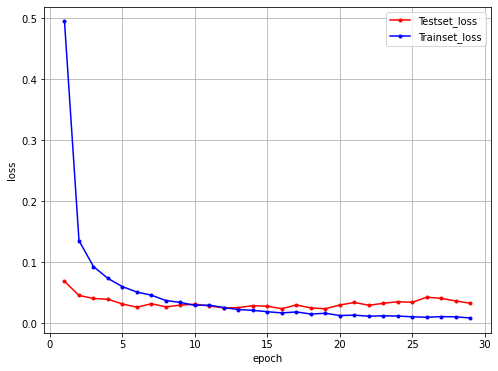

In [13]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# DNN MNIST

In [14]:
(x_train, y_class_train),(x_test,y_class_test)=mnist.load_data()

In [15]:
# 정규화
x_train=x_train.reshape(x_train.shape[0],784)
x_train=x_train/255.    # 실수로 나누기를 해 값을 실수로 만듦

In [16]:
x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_class_train, 10)
y_test = to_categorical(y_class_test, 10)

In [18]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [21]:
modelpath = MODEL_DIR + "mnist.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
# 모델의 실행
history = model.fit(x_train, y_train, validation_split=0.2, 
                    epochs=300, batch_size=1000, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.23601, saving model to ./model/mnist.hdf5

Epoch 00002: val_loss improved from 0.23601 to 0.16625, saving model to ./model/mnist.hdf5

Epoch 00003: val_loss improved from 0.16625 to 0.13725, saving model to ./model/mnist.hdf5

Epoch 00004: val_loss improved from 0.13725 to 0.11315, saving model to ./model/mnist.hdf5

Epoch 00005: val_loss improved from 0.11315 to 0.10296, saving model to ./model/mnist.hdf5

Epoch 00006: val_loss improved from 0.10296 to 0.09937, saving model to ./model/mnist.hdf5

Epoch 00007: val_loss improved from 0.09937 to 0.09399, saving model to ./model/mnist.hdf5

Epoch 00008: val_loss improved from 0.09399 to 0.08744, saving model to ./model/mnist.hdf5

Epoch 00009: val_loss did not improve from 0.08744

Epoch 00010: val_loss improved from 0.08744 to 0.08265, saving model to ./model/mnist.hdf5

Epoch 00011: val_loss improved from 0.08265 to 0.08212, saving model to ./model/mnist.hdf5

Epoch 00012: val_loss improved 

In [23]:
from tensorflow.keras.models import load_model
del model

In [24]:
model = load_model('model/mnist.hdf5')
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0682 - accuracy: 0.9796

 Test Accuracy: 0.9796


In [25]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

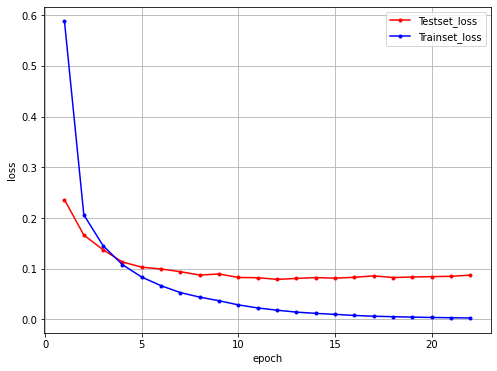

In [26]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()